<a href="https://colab.research.google.com/github/450586509/CS234/blob/master/02_value_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

马尔科夫过程相当于gym中的一个游戏


In [0]:
# If you Colab, uncomment this please
!wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/week02_value_based/mdp.py

transition_probs = {
    's0': {
        'a0': {'s0': 0.5, 's2': 0.5},
        'a1': {'s2': 1}
    },
    's1': {
        'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
        'a1': {'s1': 0.95, 's2': 0.05}
    },
    's2': {
        'a0': {'s0': 0.4, 's2': 0.6},
        'a1': {'s0': 0.3, 's1': 0.3, 's2': 0.4}
    }
}
rewards = {
    's1': {'a0': {'s0': +5}},
    's2': {'a1': {'s0': -1}}
}

from mdp import MDP
mdp = MDP(transition_probs, rewards, initial_state='s0')

In [2]:
print('initial state = {0}'.format(mdp.reset()))

initial state = s0


In [3]:
next_state, reward, done, info = mdp.step('a0')
print("next_state={0}".format(next_state))
print("reward={0}".format(reward))
print("done={0}".format(done))
print("info={0}".format(info))

next_state=s2
reward=0.0
done=False
info={}


In [4]:
print("mdp.get_all_states =", mdp.get_all_states())
print("mdp.get_possible_actions('s1') = ", mdp.get_possible_actions('s1'))
print("mdp.get_next_states('s1', 'a0') = ", mdp.get_next_states('s1', 'a0'))
print("mdp.get_reward('s1', 'a0', 's0') = ", mdp.get_reward('s1', 'a0', 's0'))
print("mdp.get_transition_prob('s1', 'a0', 's0') = ",
      mdp.get_transition_prob('s1', 'a0', 's0'))

mdp.get_all_states = ('s0', 's1', 's2')
mdp.get_possible_actions('s1') =  ('a0', 'a1')
mdp.get_next_states('s1', 'a0') =  {'s0': 0.7, 's1': 0.1, 's2': 0.2}
mdp.get_reward('s1', 'a0', 's0') =  5
mdp.get_transition_prob('s1', 'a0', 's0') =  0.7


In [5]:
from mdp import has_graphviz
from IPython.display import display
print("Graphviz available:", has_graphviz)

Graphviz available: True


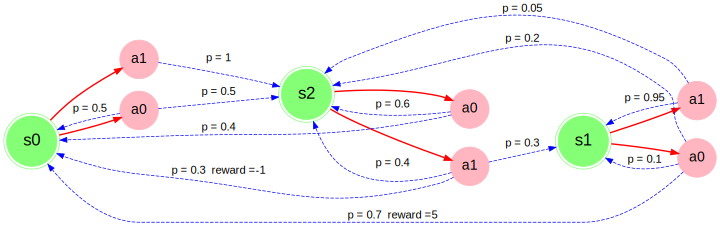

In [6]:
if has_graphviz:
    from mdp import plot_graph, plot_graph_with_state_values, \
        plot_graph_optimal_strategy_and_state_values

    display(plot_graph(mdp))


解决MDP问题最简单的方法：value iteration

1. Initialize $V^{(0)}(s)=0$, for all $s$

2. For $i=0, 1, 2, \dots$

3. $ \quad V_{(i+1)}(s) = \max_a \sum_{s'} P(s' | s,a) \cdot [ r(s,a,s') + \gamma V_{i}(s')]$, for all $s$

First, let's write a function to compute the state-action value function $Q^{\pi}$, defined as follows

$$Q_i(s, a) = \sum_{s'} P(s' | s,a) \cdot [ r(s,a,s') + \gamma V_{i}(s')]$$

In [0]:
def get_action_value(mdp, state_values, state, action, gamma):
    """ Computes Q(s,a) as in formula above """
    all_values = []
    for s_new in mdp.get_all_states():
      #print("-------------------------------------")
      #print("s_new={0}".format(s_new))
      p_s_new = mdp.get_transition_prob(state=state, action=action,next_state=s_new)
      #print("p_s_new={0}".format(p_s_new))
      r = mdp.get_reward(state=state, action=action, next_state=s_new)
      #print("r={0}".format(r))
      V = state_values[s_new]
      #print("v={0}".format(V))
      value = p_s_new * (r + gamma*V)
      #print("value={0}".format(value))
      all_values.append(value)
    return sum(all_values)

In [0]:
import numpy as np
test_Vs = {s: i for i, s in enumerate(sorted(mdp.get_all_states()))}
#print(get_action_value(mdp, test_Vs, 's2', 'a1', 0.9))
assert np.isclose(get_action_value(mdp, test_Vs, 's2', 'a1', 0.9), 0.69) 
assert np.isclose(get_action_value(mdp, test_Vs, 's1', 'a0', 0.9), 3.95)

In [0]:
def value_iteration(mdp, state_values, gamma, max_count=0):
  states = mdp.get_all_states()
  print("states={0}".format(states))
  state_values_new = {}
  count = 0
  while True:
    print("state_values={0}".format(state_values))
    for state in states:
      #print("-------------")
      all_action_values = []
      for action in mdp.get_possible_actions(state=state):
        #print("action={0}".format(action))
        value = get_action_value(mdp, state_values, state, action, gamma)
        #print("state={0}\taction={1}\tvalue={2}".format(state, action, value))
        all_action_values.append(value)
        #print(all_action_values)
      if len(all_action_values) >=1:
        state_values_new[state]=max(all_action_values)
      else:
        state_values_new[state] = 0
    count = count + 1
    if count>max_count:
      return state_values
    state_values = state_values_new
    

In [10]:
state_values = {s: 0.0 for i, s in enumerate(sorted(mdp.get_all_states()))}
state_values = value_iteration(mdp,state_values, 0.9, 30)

state_values={'s0': 0.0, 's1': 0.0, 's2': 0.0}
state_values={'s0': 0.0, 's1': 3.5, 's2': 0.0}
state_values={'s0': 0.0, 's1': 3.815, 's2': 0.7300499999999999}
state_values={'s0': 0.6570449999999999, 's1': 4.388697349999999, 's2': 1.3251684344999997}
state_values={'s0': 1.1926515910499997, 's1': 4.884883582071499, 's2': 1.8179951331628044}
state_values={'s0': 1.636195619846524, 's1': 5.29768188685905, 's2': 2.2266251747491146}
state_values={'s0': 2.003962657274203, 's1': 5.640080375354902, 's2': 2.56547668171954}
state_values={'s0': 2.3089290135475857, 's1': 5.924018315026437, 's2': 2.8464673841340202}
state_values={'s0': 2.5618206457206183, 's1': 6.159472784300493, 's2': 3.0794774843939474}
state_values={'s0': 2.7715297359545525, 's1': 6.354722231429323, 's2': 3.272699925575467}
state_values={'s0': 2.9454299330179206, 's1': 6.516631845233513, 's2': 3.432928653335055}
state_values={'s0': 3.0896357880015497, 's1': 6.6508945701123015, 's2': 3.5657975118913603}
state_values={'s0': 3.2092177

实现policy。policy告诉agent在每一步，应该采取什么action，使得最终的收益最大

In [0]:
def get_optimal_action(mdp, state_values, state, gamma=0.9):
    """ Finds optimal action using formula above. """
    if mdp.is_terminal(state):
        return None

    possible_actions = mdp.get_possible_actions(state)
    #print("next_states={0}".format(possible_actions))
    optimal_action = ""
    optimal_value = -10
    for action in possible_actions:
        action_value = get_action_value(mdp, state_values, state, action, gamma)
        #print("action={0}\tstate_action_value={1}".format(action, action_value))
        if action_value>=optimal_value:
            optimal_value=action_value
            optimal_action=action
    #print("optiaml_action={0}".format(optimal_action))
    return optimal_action

In [0]:
gamma=0.9
assert get_optimal_action(mdp, state_values, 's0', gamma) == 'a1'
assert get_optimal_action(mdp, state_values, 's1', gamma) == 'a0'
assert get_optimal_action(mdp, state_values, 's2', gamma) == 'a1'


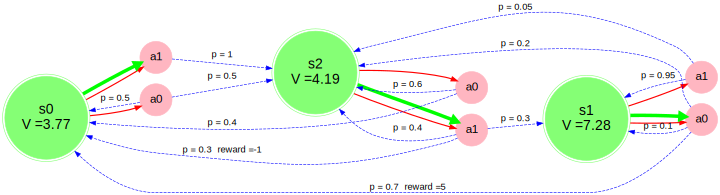

In [19]:
from mdp import plot_graph_optimal_strategy_and_state_values
if has_graphviz:
    try:
        display(plot_graph_optimal_strategy_and_state_values(mdp, state_values))
    except ImportError:
        raise ImportError("Run the cell that starts with \"%%writefile mdp_get_action_value.py\"")


计算每一步的平均收益

In [21]:
def average_reward(mdp, state_values, count=10000):
    state = mdp.reset()
    #根据policy选择最佳的action
    all_rewards = []
    while count>0:
        action = get_optimal_action(mdp, state_values, state, gamma)
        #print("action={0}\tstate={1}".format(action, state))
        #执行该action，获得reward
        state, reward, is_done, _ = mdp.step(action)
        all_rewards.append(reward)
        count = count -1
    print(sum(all_rewards)/len(all_rewards))
print("averate reward={0}".format(average_reward(mdp, state_values)))

0.4633
averate reward=None


## 例子：Frozen Lake

**步骤**


1.   状态表示方法：利用二维数组的下标表示，例如：state=ij
2.   动作：L,R,U,D分别对应：向左，向右，向上，向下。
3.   构造mdp







**利用value iteration求解**

In [0]:
from mdp import FrozenLakeEnv
frozen_lake = FrozenLakeEnv()

In [46]:
state_values = {s: 0.0 for i, s in enumerate(sorted(frozen_lake.get_all_states()))}
state_values = value_iteration(frozen_lake, state_values, 0.9, 100)

states=((0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3))
state_values={(0, 0): 0.0, (0, 1): 0.0, (0, 2): 0.0, (0, 3): 0.0, (1, 0): 0.0, (1, 1): 0.0, (1, 2): 0.0, (1, 3): 0.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0, (3, 0): 0.0, (3, 1): 0.0, (3, 2): 0.0, (3, 3): 0.0}
state_values={(0, 0): 0.0, (0, 1): 0.0, (0, 2): 0.0, (0, 3): 0.0, (1, 0): 0.0, (1, 1): 0, (1, 2): 0.0, (1, 3): 0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0, (3, 0): 0, (3, 1): 0.0, (3, 2): 0.8, (3, 3): 0}
state_values={(0, 0): 0.0, (0, 1): 0.0, (0, 2): 0.0, (0, 3): 0.0, (1, 0): 0.0, (1, 1): 0, (1, 2): 0.0, (1, 3): 0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.5760000000000001, (2, 3): 0, (3, 0): 0, (3, 1): 0.5760000000000001, (3, 2): 0.9238400000000001, (3, 3): 0}
state_values={(0, 0): 0.0, (0, 1): 0.0, (0, 2): 0.0, (0, 3): 0.0, (1, 0): 0.0, (1, 1): 0, (1, 2): 0.4147200000000001, (1, 3): 0, (2, 0): 0.0, (2, 1): 0.4665600000000001, (2,

In [53]:
s = mdp.reset()
mdp.render()
actions = []
for t in range(100):
    a = get_optimal_action(mdp, state_values, s, gamma)
    actions.append(a)
    #print(a, end='\n\n')
    s, r, done, _ = mdp.step(a)
    #mdp.render()
    if done:
        break
print("actions={0}".format(actions))

*FFF
FHFH
FFFH
HFFG

actions=['down', 'down', 'right', 'down', 'right', 'right']


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
mdp = frozen_lake

def draw_policy(mdp, state_values):
    plt.figure(figsize=(3, 3))
    h, w = mdp.desc.shape
    states = sorted(mdp.get_all_states())
    V = np.array([state_values[s] for s in states])
    Pi = {s: get_optimal_action(mdp, state_values, s, gamma) for s in states}
    plt.imshow(V.reshape(w, h), cmap='gray', interpolation='none', clim=(0, 1))
    ax = plt.gca()
    ax.set_xticks(np.arange(h)-.5)
    ax.set_yticks(np.arange(w)-.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    Y, X = np.mgrid[0:4, 0:4]
    a2uv = {'left': (-1, 0), 'down': (0, -1), 'right': (1, 0), 'up': (-1, 0)}
    for y in range(h):
        for x in range(w):
            plt.text(x, y, str(mdp.desc[y, x].item()),
                     color='g', size=12,  verticalalignment='center',
                     horizontalalignment='center', fontweight='bold')
            a = Pi[y, x]
            if a is None:
                continue
            u, v = a2uv[a]
            plt.arrow(x, y, u*.3, -v*.3, color='m',
                      head_width=0.1, head_length=0.1)
    plt.grid(color='b', lw=2, ls='-')
    plt.show()